In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df_leetcode = pd.read_csv("./survey_leetcode.csv")
df_codeforces = pd.read_csv("./survey_codeforces.csv")

In [3]:
df_leetcode.head()

,totalSolved,totalSubmissions,easySolved,mediumSolved,hardSolved,submissionCalendar,score_scaled
0,192,0.57,53,128,11,27,420.45
1,624,0.49,191,334,99,12,480.67
2,1222,0.59,308,599,315,44,780.89
3,1481,0.44,400,811,270,25,760.12
4,46,0.61,18,28,0,18,280.34


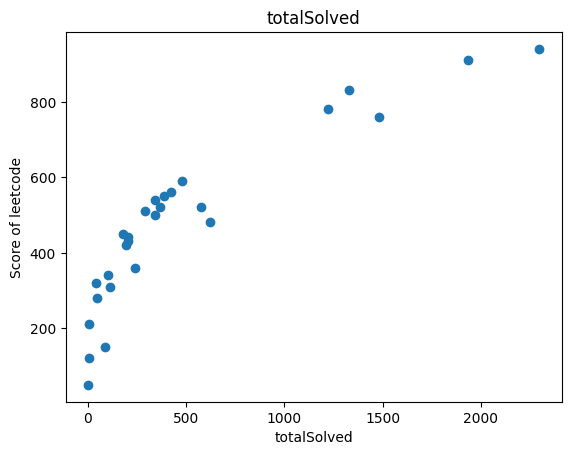

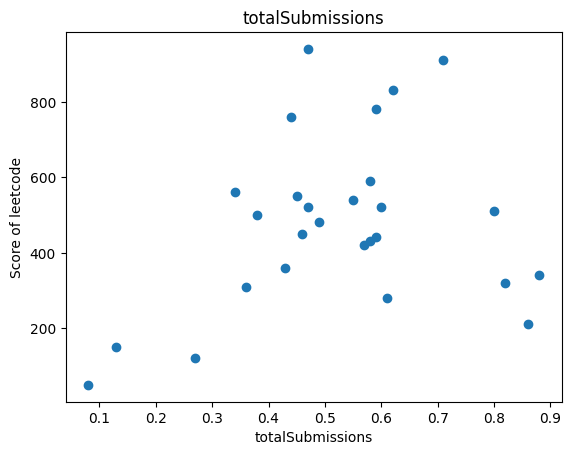

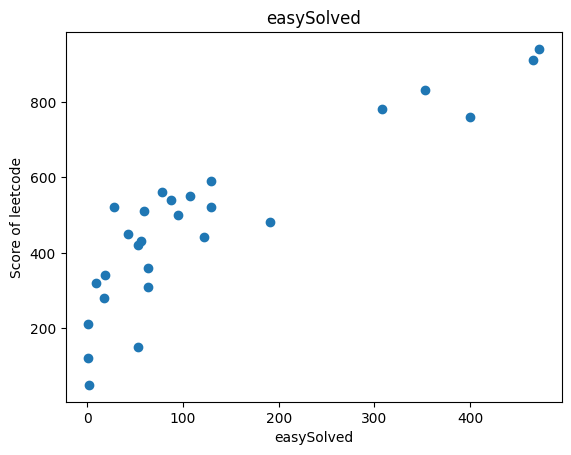

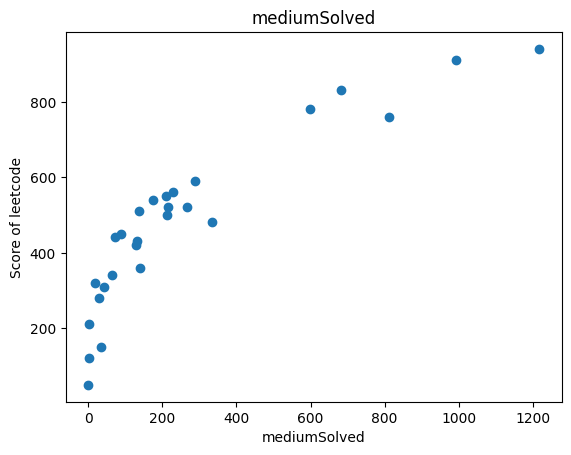

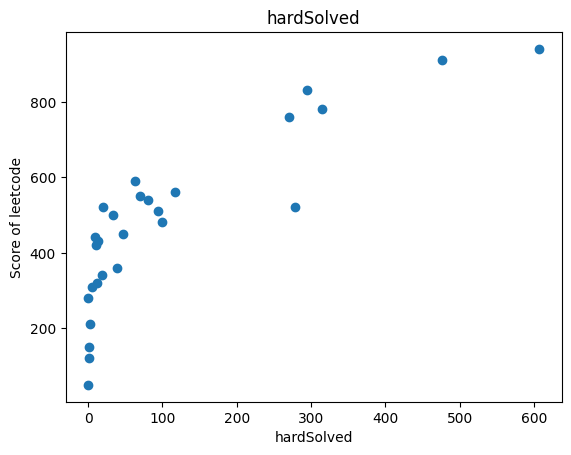

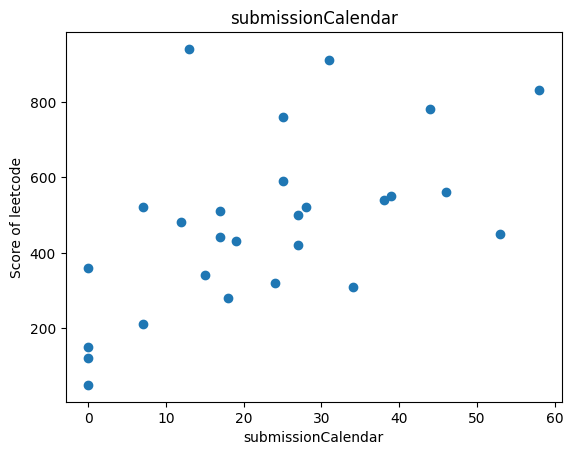

In [5]:
for label in df_leetcode.columns[:-1]:
  plt.scatter(df_leetcode[label], df_leetcode["score_scaled"])
  plt.title(label)
  plt.ylabel("Score of leetcode")
  plt.xlabel(label)
  plt.show()

In [8]:
train, test = np.split(df_leetcode.sample(frac=1), [int(0.7*len(df_leetcode))])

c:\Users\nkca1\anaconda3\envs\trailio_dev\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)

  return X, y

In [11]:
X_train, y_train = get_xy(train, "score_scaled", x_labels=df_leetcode.columns[:-1])
X_test, y_test = get_xy(test, "score_scaled", x_labels=df_leetcode.columns[:-1])

In [ ]:
leetcode_reg = LinearRegression()
leetcode_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
leetcode_reg.score(X_test, y_test)

0.8730208401271584

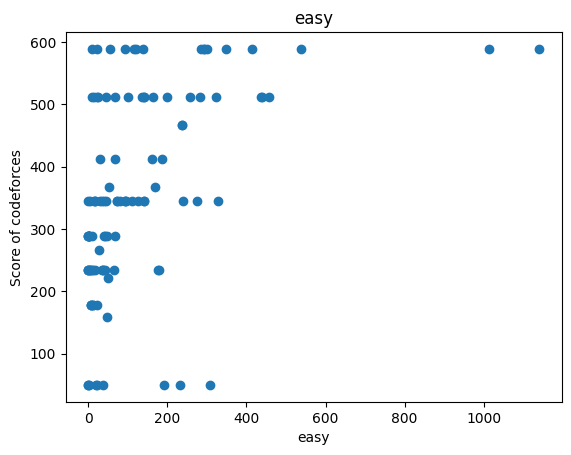

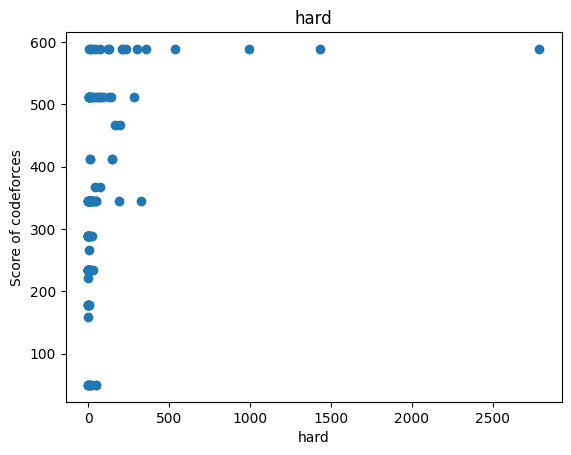

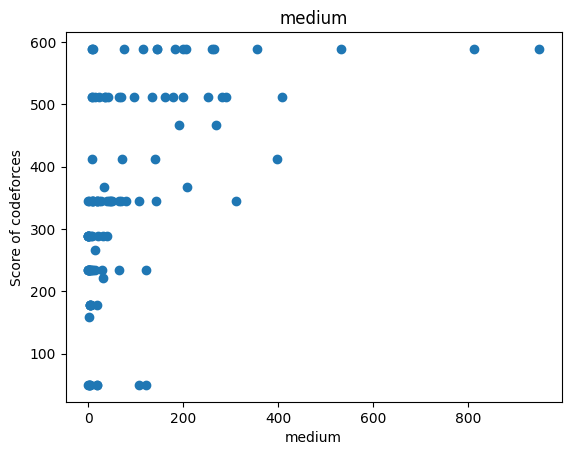

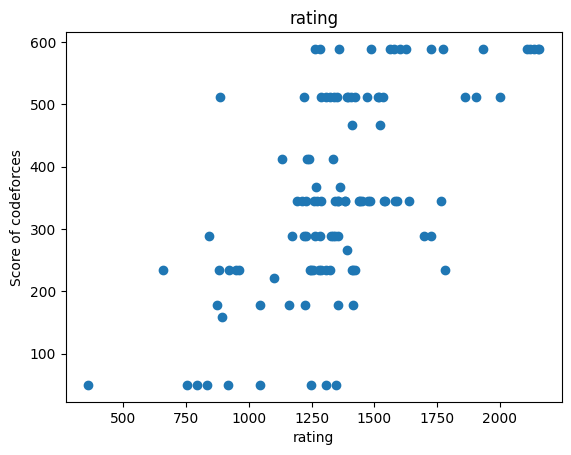

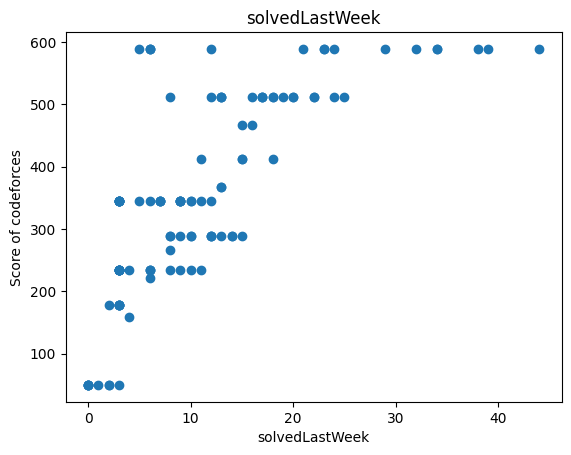

In [19]:
for label in df_codeforces.columns[:-1]:
  plt.scatter(df_codeforces[label], df_codeforces["finalScore"])
  plt.title(label)
  plt.ylabel("Score of codeforces")
  plt.xlabel(label)
  plt.show()

In [ ]:
train, test = np.split(df_codeforces.sample(frac=1), [int(0.7*len(df_codeforces))])

In [20]:
X_train, y_train = get_xy(train, "finalScore", x_labels=df_codeforces.columns[:-1])
X_test, y_test = get_xy(test, "finalScore", x_labels=df_codeforces.columns[:-1])

In [22]:
codeforces_reg = LinearRegression()
codeforces_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
codeforces_reg.score(X_test, y_test)

0.6025017689138132

In [17]:
train, test = np.split(df_codeforces.sample(frac=1), [int(0.7*len(df_codeforces))])

c:\Users\nkca1\anaconda3\envs\trailio_dev\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
